# Demand Estimation for Bike Sharing in D.C.

### EDA and Random Forest Model are utilized to predict bike sharing demand with information available prior to the rental period

### Data available at: https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('Sample_Submission.csv')

## EDA

In [66]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [67]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [68]:
ss.columns

Index(['datetime', 'count'], dtype='object')

In [179]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011


In [70]:
# Checking missing values

missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

Series([], dtype: int64)


In [188]:
# Converting datetime from object datatype to datetime

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hour                   int64
year                   int64
dtype: object

<AxesSubplot:xlabel='datetime'>

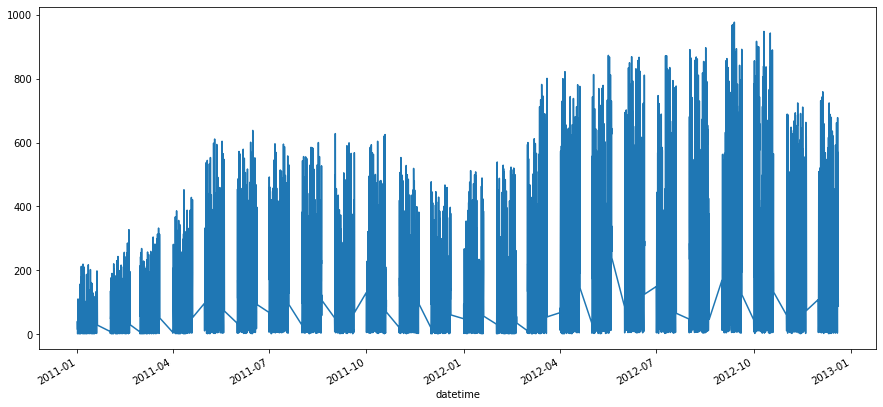

In [180]:
# Plotting demand over time

train_date_index = train.set_index('datetime')
train_date_index["count"].plot(figsize=(15, 7))

Text(0.5, 1.0, 'Demand at Different Hours across Years')

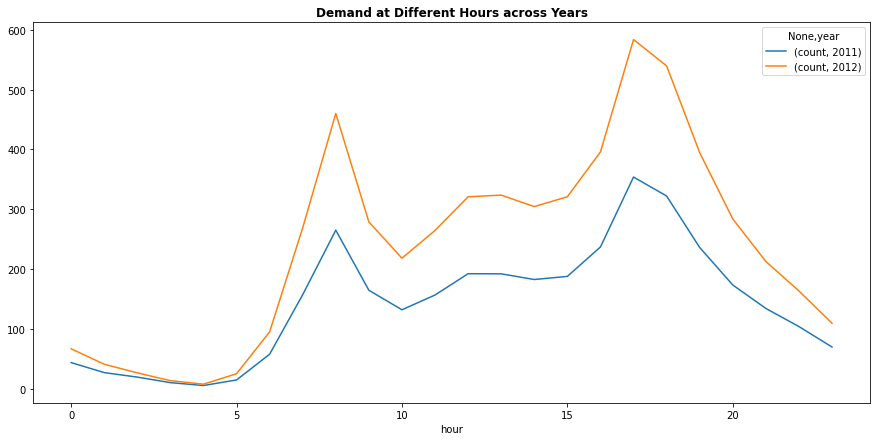

In [184]:
# Plotting demand across hours for each year

train['hour'] = train['datetime'].dt.hour
train['year'] = train.datetime.dt.year

piv = pd.pivot_table(train, index=['hour'],columns=['year'], values=['count'])

piv.plot(figsize=(15, 7)).set_title('Demand at Different Hours across Years', fontweight="bold")

Text(0.5, 1.0, 'Count Boxplot')

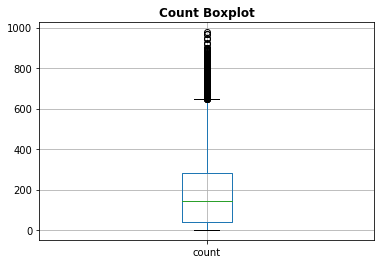

In [185]:
train.boxplot(column= ["count"]).set_title('Count Boxplot', fontweight="bold")

Text(0.5, 1.0, 'Boxplots of Temp, Atemp, Weather, Humidity, and Windspeed')

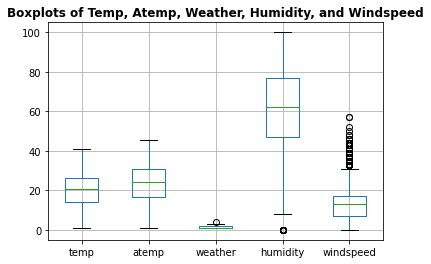

In [186]:
train.boxplot(column=["temp", "atemp", "weather", 'humidity', 'windspeed']).set_title('Boxplots of Temp, Atemp, Weather, Humidity, and Windspeed', fontweight="bold") 
                                                                        

## Random Forest Model

In [187]:
# Creating the list of features
feature_names = ['year', 'hour', 'season', 'holiday', 'workingday',
                 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X_train = train[feature_names]

X_train.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,4,1,0,1,1,10.66,12.880,56,11.0014


In [189]:
# Assigning the data corresponding to features in feature_names
test['year'] = test.datetime.dt.year
test['hour'] = test.datetime.dt.hour

X_test = test[feature_names]
X_test.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,4,1,0,1,1,10.66,12.880,56,11.0014


In [162]:
# Assigning the data corresponding to the target variable

y_train = train['count']
print(y_train)

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


In [163]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [190]:
# Prediction
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)

print(pred)

               0
0      10.840000
1       4.860000
2       3.580000
3       3.943333
4       3.030000
...          ...
6488  220.650000
6489  156.890000
6490  101.890000
6491  106.123333
6492   55.610000

[6493 rows x 1 columns]


<AxesSubplot:>

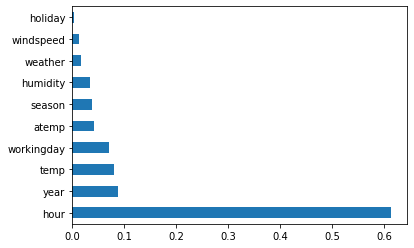

In [192]:
# Calculating feature importance

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [194]:
# print 

datasets = pd.concat([ss['datetime'], pred], axis=1)
datasets.columns =['datetime', 'count']
datasets.to_csv('submission.csv', index=False)